<a href="https://colab.research.google.com/github/AkshayRai20/Projects1/blob/main/Akshay_Rai_Team_1_Capstone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

In [79]:
# Importing the libraries
!pip install catboost==0.14.2
import catboost
import numpy as np
import pandas as pd
from numpy import math
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.tokenize import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)



import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
file_loc='/content/drive/MyDrive/Cohort Aravali/CohortAravali-201005-153433.zip (Unzipped Files)/AlmaBetter/Module 4/Week 1/Day 1/Coronavirus Tweets.csv'

In [7]:
twt = pd.read_csv(file_loc,encoding = 'latin')

**EDA**

In [8]:
twt.head(13)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative


In [9]:
twt.describe()

,UserName,ScreenName
count,41157.000000,41157.000000
mean,24377.000000,69329.000000
std,11881.146851,11881.146851
min,3799.000000,48751.000000
25%,14088.000000,59040.000000
50%,24377.000000,69329.000000
75%,34666.000000,79618.000000
max,44955.000000,89907.000000


In [10]:
twt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [11]:
twt.shape


(41157, 6)

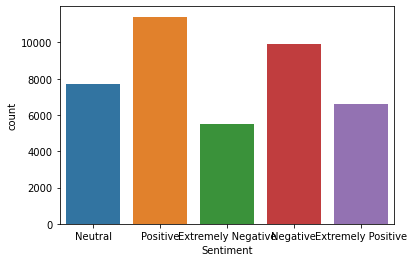

In [21]:
sns.countplot(twt['Sentiment'])

In [13]:
sns.countplot(twt['Location'])

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f1173f5f730> (for post_execute):


ValueError: ignored

ValueError: ignored

<Figure size 432x288 with 1 Axes>

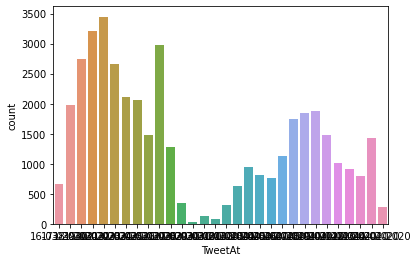

In [22]:
sns.countplot(twt['TweetAt'])

In [23]:
twt[twt['Sentiment']=='Extremely Negative'].loc[4,'OriginalTweet']

"Me, ready to go at supermarket during the #COVID19 outbreak.\r\r\n\r\r\nNot because I'm paranoid, but because my food stock is litteraly empty. The #coronavirus is a serious thing, but please, don't panic. It causes shortage...\r\r\n\r\r\n#CoronavirusFrance #restezchezvous #StayAtHome #confinement https://t.co/usmuaLq72n"

In [24]:
twt[twt['Sentiment']=='Neutral'].loc[10,'OriginalTweet']

"All month there hasn't been crowding in the supermarkets or restaurants, however reducing all the hours and closing the malls means everyone is now using the same entrance and dependent on a single supermarket. #manila #lockdown #covid2019 #Philippines https://t.co/HxWs9LAnF9"

In [25]:
twt[twt['Sentiment']=='Neutral']

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
10,3809,48761,"Makati, Manila",16-03-2020,All month there hasn't been crowding in the su...,Neutral
16,3815,48767,Saudi Arabia,16-03-2020,????? ????? ????? ????? ??\r\r\n?????? ????? ?...,Neutral
17,3816,48768,"Ontario, Canada",16-03-2020,@eyeonthearctic 16MAR20 Russia consumer survei...,Neutral
...,...,...,...,...,...,...
41141,44940,89892,India,14-04-2020,#Coronavirus ?? ????? ??? ????? ?? ??? ???????...,Neutral
41143,44942,89894,In burning hell.,14-04-2020,https://t.co/8s4vKvcO1r #5gtowers?? #EcuadorUn...,Neutral
41144,44943,89895,NaN,14-04-2020,@_Sunrise_SV @Gamzap @NPR What does not having...,Neutral
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral


In [26]:
twt[twt['Sentiment']=='Extremely Positive'].loc[11,'OriginalTweet']

'Due to the Covid-19 situation, we have increased demand for all food products. \r\r\n\r\r\nThe wait time may be longer for all online orders, particularly beef share and freezer packs. \r\r\n\r\r\nWe thank you for your patience during this time.'

In [27]:
twt['Location'].unique()

array(['London', 'UK', 'Vagabonds', ..., 'Juba south sudan', 'OHIO',
       'i love you so much || he/him'], dtype=object)

In [28]:
top10_loc = twt[twt['Location'].value_counts()[0:10]
                

SyntaxError: ignored

In [29]:
twt.TweetAt.value_counts()

20-03-2020    3448
19-03-2020    3215
25-03-2020    2979
18-03-2020    2742
21-03-2020    2653
22-03-2020    2114
23-03-2020    2062
17-03-2020    1977
08-04-2020    1881
07-04-2020    1843
06-04-2020    1742
24-03-2020    1480
09-04-2020    1471
13-04-2020    1428
26-03-2020    1277
05-04-2020    1131
10-04-2020    1005
02-04-2020     954
11-04-2020     909
03-04-2020     810
12-04-2020     803
04-04-2020     767
16-03-2020     656
01-04-2020     630
27-03-2020     345
31-03-2020     316
14-04-2020     284
29-03-2020     125
30-03-2020      87
28-03-2020      23
Name: TweetAt, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

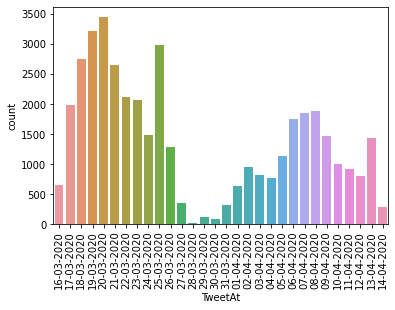

In [30]:
sns.countplot(twt['TweetAt'])
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text major ticklabel objects>)

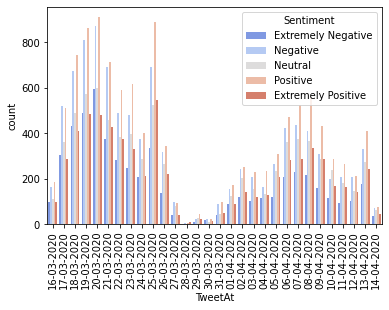

In [31]:
sns.countplot(twt['TweetAt'],hue = twt['Sentiment'],hue_order=[ 'Extremely Negative', 'Negative','Neutral', 'Positive','Extremely Positive'],palette = 'coolwarm')
plt.xticks(rotation = 90)

In [32]:
from sklearn.metrics import *
pun=string.punctuation

In [33]:
pun

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [34]:
pun = pun.replace('#','')

In [36]:
pun

'!"$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [37]:
#Function to remove punctuation and links from tweets
def rem_pun(tweet):
  string1 = ''
  for i in tweet:
    if i not in pun:
      string1+=i
    else:
      string1+=' '
  return string1

def rem_links(tweet):
  a=[]
  for word in tweet.split():
    if word.startswith('https:') or word.startswith('http:'):
      continue
    else:
      a.append(word)
  return ' '.join(a)

In [38]:
twt['filt_tweets']=twt['OriginalTweet'].apply(rem_links).apply(lambda x :  x.replace('\r','').replace('\n',''))

In [39]:
twt['filt_tweets']=twt['filt_tweets'].apply(rem_pun)

In [40]:
twt.head(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,filt_tweets
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,MeNyrbie Phil Gahan Chrisitv and and
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elde...


In [41]:
#Function to extract hashtags
def get_tags(tweet):
  string2 = ''
  for word in tweet.lower().split():
    if word.startswith("#"):
      string2+=word[1:]+','
  return string2[:-1]

In [42]:
twt['hashtags'] = twt['filt_tweets'].apply(get_tags)

In [43]:
twt.head(15)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,filt_tweets,hashtags
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,MeNyrbie Phil Gahan Chrisitv and and,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...,
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elde...,
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...,"covid19france,covid,covid19,coronavirus,confin..."
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the #COV...,"covid19,coronavirus,coronavirusfrance,restezch..."
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,As news of the regionÂs first confirmed COVID...,
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive,Cashier at grocery store was sharing his insig...,covid
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral,Was at the supermarket today Didn t buy toile...,"rebel,toiletpapercrisis,covid"
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive,Due to COVID 19 our retail store and classroom...,
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative,For corona prevention we should stop to buy th...,"govindia,indiafightscorona"


In [44]:
twt['hashtags'].unique()

array(['',
       'covid19france,covid,covid19,coronavirus,confinement,confinementotal,confinementgeneral',
       'covid19,coronavirus,coronavirusfrance,restezchezvous,stayathome,confinement',
       ..., 'coronavirus,stayhome,socialdistancing', 'nz,covid',
       'coronavirus,covid19,coronavirus'], dtype=object)

In [45]:
#Removing weblinks and names
def rem_links_names(tweet):
  a=[]
  for word in tweet.split():
    if word.startswith('https') or word.startswith('http') or word.startswith('@'):
      continue
    else:
      a.append(word)
  return ' '.join(a)

In [46]:
twt['filt_tweets2']=twt['filt_tweets'].apply(rem_links_names)

In [47]:
twt.head(20)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,filt_tweets,hashtags,filt_tweets2
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,MeNyrbie Phil Gahan Chrisitv and and,,MeNyrbie Phil Gahan Chrisitv and and
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...,,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elde...,,Coronavirus Australia Woolworths to give elder...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...,"covid19france,covid,covid19,coronavirus,confin...",My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the #COV...,"covid19,coronavirus,coronavirusfrance,restezch...",Me ready to go at supermarket during the #COVI...
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive,As news of the regionÂs first confirmed COVID...,,As news of the regionÂs first confirmed COVID...
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive,Cashier at grocery store was sharing his insig...,covid,Cashier at grocery store was sharing his insig...
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral,Was at the supermarket today Didn t buy toile...,"rebel,toiletpapercrisis,covid",Was at the supermarket today Didn t buy toilet...
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive,Due to COVID 19 our retail store and classroom...,,Due to COVID 19 our retail store and classroom...
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative,For corona prevention we should stop to buy th...,"govindia,indiafightscorona",For corona prevention we should stop to buy th...


In [48]:
#Removing unnecessary columns like UserName and Screenname
twt.drop(['UserName','ScreenName'], axis = 1)

,Location,TweetAt,OriginalTweet,Sentiment,filt_tweets,hashtags,filt_tweets2
0,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,MeNyrbie Phil Gahan Chrisitv and and,,MeNyrbie Phil Gahan Chrisitv and and
1,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...,,advice Talk to your neighbours family to excha...
2,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elde...,,Coronavirus Australia Woolworths to give elder...
3,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...,"covid19france,covid,covid19,coronavirus,confin...",My food stock is not the only one which is emp...
4,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the #COV...,"covid19,coronavirus,coronavirusfrance,restezch...",Me ready to go at supermarket during the #COVI...
...,...,...,...,...,...,...,...
41152,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,Airline pilots offering to stock supermarket s...,"nz,covid",Airline pilots offering to stock supermarket s...
41153,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative,Response to complaint not provided citing COVI...,,Response to complaint not provided citing COVI...
41154,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive,You know itÂs getting tough when KameronWild...,"coronavirus,toiletpaper",You know itÂs getting tough when KameronWilds...
41155,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,Is it wrong that the smell of hand sanitizer i...,"coronavirus,covid19,coronavirus",Is it wrong that the smell of hand sanitizer i...


In [49]:
#Removing location as it has too many irrelevant data
twt.drop(['Location'], axis = 1)

,UserName,ScreenName,TweetAt,OriginalTweet,Sentiment,filt_tweets,hashtags,filt_tweets2
0,3799,48751,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,MeNyrbie Phil Gahan Chrisitv and and,,MeNyrbie Phil Gahan Chrisitv and and
1,3800,48752,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...,,advice Talk to your neighbours family to excha...
2,3801,48753,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elde...,,Coronavirus Australia Woolworths to give elder...
3,3802,48754,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...,"covid19france,covid,covid19,coronavirus,confin...",My food stock is not the only one which is emp...
4,3803,48755,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the #COV...,"covid19,coronavirus,coronavirusfrance,restezch...",Me ready to go at supermarket during the #COVI...
...,...,...,...,...,...,...,...,...
41152,44951,89903,14-04-2020,Airline pilots offering to stock supermarket s...,Neutral,Airline pilots offering to stock supermarket s...,"nz,covid",Airline pilots offering to stock supermarket s...
41153,44952,89904,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative,Response to complaint not provided citing COVI...,,Response to complaint not provided citing COVI...
41154,44953,89905,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive,You know itÂs getting tough when KameronWild...,"coronavirus,toiletpaper",You know itÂs getting tough when KameronWilds...
41155,44954,89906,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral,Is it wrong that the smell of hand sanitizer i...,"coronavirus,covid19,coronavirus",Is it wrong that the smell of hand sanitizer i...


In [68]:
twt.head(3)


,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,filt_tweets,hashtags,filt_tweets2
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,MeNyrbie Phil Gahan Chrisitv and and,,MeNyrbie Phil Gahan Chrisitv and and
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...,,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elde...,,Coronavirus Australia Woolworths to give elder...


In [70]:
#Function to remove stopwords
def rem_stopwords(tweet):
  a= []
  stpw = stopwords.words('english')
  for word in tweet.lower().split():
    if word.startswith('#'):
      continue
    if word not in stpw:
      a.append(word)
  return ' '.join(a)

In [74]:
twt['wordsa']=twt['filt_tweets2'].apply(rem_stopwords)

AttributeError: ignored

In [64]:
twt.head(3)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,filt_tweets,hashtags,filt_tweets2
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,MeNyrbie Phil Gahan Chrisitv and and,,MeNyrbie Phil Gahan Chrisitv and and
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...,,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elde...,,Coronavirus Australia Woolworths to give elder...


In [ ]:
#ERROR##Need to import stylecloud###

hashtags = twt['hashtags'].dropna().tolist()
unique_hashtags=(" ").join(hashtags)
stylecloud.gen_stylecloud(text = unique_hashtags,
                          icon_name='fas fa-first-aid',
                          palette='colorbrewer.diverging.Spectral_11',
                          background_color='black',
                          gradient='horizontal')

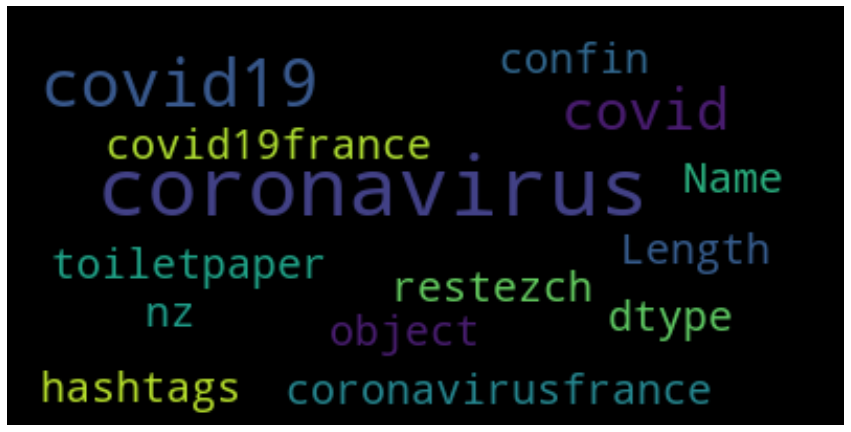

In [63]:
def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color='black',stopwords=stopwords,max_words=200,max_font_size=40).generate(str(data))
  
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(twt['hashtags'])

In [61]:
def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color='black',stopwords=stopwords,max_words=200,max_font_size=40).generate(str(data))
  
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(twt['words'])

KeyError: ignored

KeyError: ignored

In [77]:
#remove similar COVID19 words

simicovid = ["coronavirus", "covid", "coronavirusoutbreak","virus","corona","coronavirusfrance"]

In [80]:
#Lemmatization
wnl = WordNetLemmatizer()
def lemmatizeWords(word):
    if word in specialWords:
            return word
    else:
        return wnl.lemmatize(word)

In [ ]:
twt['words'].apply(lambda x: x.split())

In [82]:
senti = SentimentIntensityAnalyzer()
scores = twt["words"].apply(lambda tweet: s.polarity_scores(tweet))
scores_df = pd.DataFrame(list(scores))
scores_df.head()

LookupError: ignored

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
hashv = TfidfVectorizer(min_df=10)
wordv = TfidfVectorizer(min_df=10)

In [ ]:
X_hash = ht_vect.fit_transform(twt['hashtags'])
X_word = w_vect.fit_transform(twt['words'])

**Done till now**

Day1
1. Basic EDA

Day 2
1. Removal of punctuations and extraction of hashtags

Day 3

1. Remove weblinks and removal of names starting with @
2. Extract Words
3. Separate data for words and hashtags
4. Explored usage of wordclouds for all data

Day 4
1. Removed similar sounding covid words
2. Tried creating wordclouds for each sentiment - in process


**Next steps:**
0. Create wordclouds for each sentiment
1. Taking care of synonyms
2. Count Vectorizer / tfidf (n_gram_rage)
3. Training and testing 
> Models
  a. CatBoost
  b. Evaluation METRICS
4. Drawing Conclusions

**Explore**

from nltk.stem.porter import PorterStemmer

from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer

from nltk.tokenize import sent_tokenize

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.sentiment.util import *

from nltk.tokenize import word_tokenize

**#####To think about####**
1. How do we handle sarcastic tweets
2. Locations are too many - *Sorted*
3. Tackling ads which are always having positive words